# Semesterarbeit Analysis mit Python Teil 4

## Einleitung: Newton-Verfahren

Newton hat ein Verfahren entwickelt um Nullstellen einer stetig differenzierbaren Funktion näherungsweise zu bestimmen.
Diese werde ich implementieren und testen, sowie die Konvergenzgeschwindigkeiten untersuchen.

## Theoretische Beschreibung des Lösungsansatzes

### Aufgabe 1 Das Verfahren

Grundlegend wird beim Newton-Verfahren zur Bestimmung von Nullstellen (1) ausgehend
 von einem Startwert $x_{0}$ folgendermassen iteriert:

$$ x_{n+1} = x_{n} - \frac{f(x_{n})}{f'(x_{n})} $$


Nun muss uns bewusst sein, dass das Newtonverfahren lokal konvergent ist. Dies bedeutet, dass der Startwert für die
 Approximation, genügend nahe an der gesuchten Nullstelle sein muss, um zu funktionieren. Zum Beispiel ist es
  offensichtlich an einem Polynom n-ten Grades mit bis zu n Nullstellen ersichtlich. Ist der Startwert zu weit von der
   gesuchten Nullstelle entfernt, konvergiert das Verfahren zu einer der anderen Nullstellen. Darüber hinaus gibt es
    Fälle, welche bei zu weit entferntem Startwert divergieren oder oszillieren.

Folglich ist das Verfahren nicht geeignet, um Nullstellen ins Blaue hinaus zu suchen. Damit dies ersichtlicher wird,
 plote ich die Kurven, um eine Vorstellung der Kurven und ihren Nullstellen zu erhalten.

### Aufgabe 2 Die Funktion

Die Anzahl Iterationsschritte ist bei der Umsetzung auf 10 festgesetzt. Die Ableitung (3) der Funktion f halte ich
 bewusst aus der For-Schleife heraus und leite sie vorher ab. Somit bleibt die Funktion performant und es wird nicht jedes
  mal unnötig dieselbe Ableitung berechnen. Mit der Methode .diff ist das Ableiten dank der Sympy library sehr leicht.

Aus praktischen Gründen erstellen ich auch gleich eine Funktion solve_n(f, x0, n) mit einem Parameter für die Anzahl Iterationen.

In [1]:
from sympy import *

x = symbols('x')

#The Newton Methode implemented

def solve(f, x0):
        
    #Initialise
    
    #Define 10 iterations
    n=10
    #Derivative of f
    f_diff = f.diff(x)
    
    print(f"x0 = {x0}")
    
    #The implemented formula
    for i in range(n):
            
        x_np1 = x0 - f.subs(x, x0) / f_diff.subs(x, x0)
        print(f"x{i+1} = {N(x_np1)}")
        x0 = x_np1
        
    return "Done" 

#The Newton Methode with variable amount of iterations n
def solve_n(f, x0, n):
        
    #Initialise
    
    #Derivative of f
    f_diff = f.diff(x)
    
    print(f"x0 = {x0}")
    
    #The implemented formula
    for i in range(n):
            
        x_np1 = x0 - f.subs(x, x0) / f_diff.subs(x, x0)
        print(f"x{i+1} = {N(x_np1)}")
        x0 = x_np1
        
    return "Done" 

### Aufgabe 3 Test

Ich untersuche die Funktionen $x²-4$, $ln(x)$ und $sin(x)$ mit verschiedenen Startwerten.

#### $x^2-4$ :

In [2]:
#Import libraries
import numpy as np
import matplotlib.pyplot as plt

#Define x-Axis. numpy.linspace(start, stop, number of samples)
x1 = np.linspace(-4,4, 100)

#Define Graphs
y1 = x1**2-4

#assign plot
ax = plt.gca()

#Adjust axes
# Make upper and right axis invisible
ax.spines['top'].set_color('none')
ax.spines['right'].set_color('none')
#move lower axis to y=0 :
ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('data',0))
#move left axis to y=0 x == 0:
ax.yaxis.set_ticks_position('left')
ax.spines['left'].set_position(('data',0))


plt.plot(x1, y1, label = 'x²-4')
plt.legend()

ax.xaxis.set_label_coords( 1, 0.2)
ax.yaxis.set_label_coords( 0.48, 1.05)
plt.xlabel('x')
plt.ylabel('y')


#Bring Graph to the fore front
plt.show()

<Figure size 640x480 with 1 Axes>

In [3]:
f1 = x**2 -4
print(solve(f1, 1))

x0 = 1
x1 = 2.50000000000000
x2 = 2.05000000000000
x3 = 2.00060975609756
x4 = 2.00000009292229
x5 = 2.00000000000000
x6 = 2.00000000000000
x7 = 2.00000000000000
x8 = 2.00000000000000
x9 = 2.00000000000000
x10 = 2.00000000000000
Done


In [4]:
print(solve(f1, 0.02))

x0 = 0.02
x1 = 100.010000000000
x2 = 50.0249980002000
x3 = 25.0524790116932
x4 = 12.6060719247887
x5 = 6.46168966609624
x6 = 3.54036139966595
x7 = 2.33509477899696
x8 = 2.02404367307079
x9 = 2.00014280774235
x10 = 2.00000000509815
Done


In [5]:
print(solve(f1,20))

x0 = 20
x1 = 10.1000000000000
x2 = 5.24801980198020
x3 = 3.00510602399736
x4 = 2.16808693460538
x5 = 2.00651570219212
x6 = 2.00001057912854
x7 = 2.00000000002798
x8 = 2.00000000000000
x9 = 2.00000000000000
x10 = 2.00000000000000
Done


In [6]:
print(solve(f1,-4))

x0 = -4
x1 = -2.50000000000000
x2 = -2.05000000000000
x3 = -2.00060975609756
x4 = -2.00000009292229
x5 = -2.00000000000000
x6 = -2.00000000000000
x7 = -2.00000000000000
x8 = -2.00000000000000
x9 = -2.00000000000000
x10 = -2.00000000000000
Done


#### $ln(x)$ :

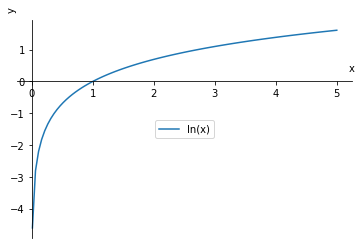

In [7]:
#Import libraries
import numpy as np
import matplotlib.pyplot as plt

#Define x-Axis. numpy.linspace(start, stop, number of samples)
x1 = np.linspace(0.01 , 5, 100)

#Define Graphs
y1 = np.log(x1)

#assign plot
ax = plt.gca()

#Adjust axes
# Make upper and right axis invisible
ax.spines['top'].set_color('none')
ax.spines['right'].set_color('none')
#move lower axis to y=0 :
ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('data',0))
#move left axis to y=0 x == 0:
ax.yaxis.set_ticks_position('left')
ax.spines['left'].set_position(('data',0))

plt.plot(x1, y1, label = 'ln(x)')
plt.legend(loc=10)

ax.xaxis.set_label_coords( 1, 0.8)
ax.yaxis.set_label_coords( 0, 1.05)
plt.xlabel('x')
plt.ylabel('y')


#Bring Graph to the fore front
plt.show()

In [8]:
f2 = ln(x)
print(solve(f2, 2.22))

x0 = 2.22
x1 = 0.449534025137102
x2 = 0.808956137441998
x3 = 0.980463398658913
x4 = 0.999807905535545
x5 = 0.999999981548677
x6 = 1.00000000000000
x7 = 1.00000000000000
x8 = 1.00000000000000
x9 = 1.00000000000000
x10 = 1.00000000000000
Done


In [9]:
print(solve(f2, 0.01))

x0 = 0.01
x1 = 0.0560517018598809
x2 = 0.217563602708806
x3 = 0.549405543411256
x4 = 0.878454640902389
x5 = 0.992294460775344
x6 = 0.999970235784316
x7 = 0.999999999557041
x8 = 1.00000000000000
x9 = 1.00000000000000
x10 = 1.00000000000000
Done


In [10]:
print(solve_n(f2, 20.1, 6))

x0 = 20.1
x1 = -40.2144682828071
x2 = 108.346899739778 + 126.337478125287*I
x3 = -336.912721467891 - 613.212853146908*I
x4 = 3141.38172841521 + 2705.21992434874*I
x5 = -21102.5177985273 - 22062.0863330642*I
x6 = 248303.764244419 + 156508.339841418*I
Done


#### $sin(x)$ :

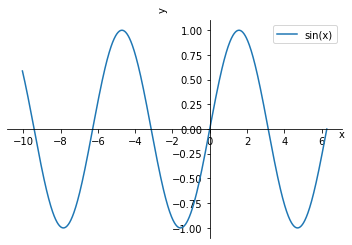

In [11]:
#Import libraries
import numpy as np
import matplotlib.pyplot as plt

#Define x-Axis. numpy.linspace(start, stop, number of samples)
x1 = np.linspace(-3.2 * np.pi, 2 * np.pi, 1000)

#Define Graphs
y1 = np.sin( x1 )

#assign plot
ax = plt.gca()

#Adjust axes
# Make upper and right axis invisible
ax.spines['top'].set_color('none')
ax.spines['right'].set_color('none')
#move lower axis to y=0 :
ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('data',0))
#move left axis to y=0 x == 0:
ax.yaxis.set_ticks_position('left')
ax.spines['left'].set_position(('data',0))

plt.plot(x1, y1, label = 'sin(x)')
plt.legend(loc=1)

ax.xaxis.set_label_coords( 1, 0.5)
ax.yaxis.set_label_coords( 0.48, 1.05)
plt.xlabel('x')
plt.ylabel('y')


#Bring Graph to the fore front
plt.show()

In [12]:
f3 = sin(x)
print(solve(f3, 0.1))

x0 = 0.1
x1 = -0.000334672085450544
x2 = 1.24950280157299E-11
x3 = 0
x4 = 0
x5 = 0
x6 = 0
x7 = 0
x8 = 0
x9 = 0
x10 = 0
Done


In [13]:

print(solve(f3, 0.8))

x0 = 0.8
x1 = -0.229638557050364
x2 = 0.00412357916974798
x3 = -2.33724753561509E-8
x4 = 3.30872245021211E-24
x5 = 0
x6 = 0
x7 = 0
x8 = 0
x9 = 0
x10 = 0
Done


In [14]:

print(solve_n(f3, 1.45, 7))


x0 = 1.45
x1 = -6.78809275296560
x2 = -6.23540102724491
x3 = -6.28322170963890
x4 = -6.28318530717957
x5 = -6.28318530717959
x6 = -6.28318530717959
x7 = -6.28318530717959
Done


### Aufgabe 4 Diskussion Konvergenz Geschwindigkeit

Die Funktion $x²-2$ hat zwei Nullstellen -2 und 2. Da der Scheitel bei x = 0 ist, konvergieren alle negativen Werte
 zu der Nullstelle -2 und alle positiven Werte zu der Nullstelle 2. Interessant ist, dass der Startwert 0.02 langsamer
  konvergiert als der Startwert 20. Der Fehler scheint sich ungefähr zu halbieren bevor die erste Ziffer korrekt ist.
   Danach sind nach etwa 4 Iterationen alle 14 Nachkommastellen korrekt.

$ln(x)$ hat eine Nullstelle bei x = 1. Die sehr kleinen Zahlen, wie z.B. 0.1, konvergieren langsamer gegen die Nullstelle 
als weiter von der Nullstelle entfernte positive Zahlen, wie z.B. 2.22. Es kommt jedoch einen Punkt, bei welchem es
 sich anders verhält. Sobald der Startwert so gross ist, dass die erste Iteration einen negativen Wert
  erreicht, ergeben sich nur noch imaginäre Lösungen, welche divergieren. So sehen wir das Problem mit nicht stetig
   differenzierbaren Funktionen.

Die Funktion $sin(x)$ konvergiert schon nach 5 Durchgängen soweit, dass numerisch kein Fehler mehr festzustellen ist.
 Falls der Startwert näher an der Nullstelle liegt, sogar noch schneller. Ist der Startwert aber zu nahe am Scheitel, wie mit
  dem Startwert 1.45, so finden wir die weiter entfernte Nullstelle $-2*Pi$

Wie eingangs erwähnt bestätigt sich das Problem mit der lokalen Konvergenz. Das Verfahren ist effektiv besser, wenn der
 Startwert schon näher an der gesuchten Nullstelle liegt. Beziehungsweise funktioniert das Verfahren nicht, bei zu weit 
 entfernten Startwerten oder findet eine andere Nullstelle als die nächste nebenan liegende.

Die Rechenzeit scheint für den Aufruf solve(sin(x), 1.45) für jede weitere Iteration exponentiell mehr Rechenzeit zu 
benötigen. Hier könnte man auch ein Abbruchkriterium einfügen z.B. wenn sich 14 Stellen nach dem Komma nichts mehr verändert.

Das gleiche Verhalten mit exponentiell ansteigender Rechenzeit, war auch beim Divergieren in der komplexen
 Ebene, mit solve(ln(x), 20.1)) festzustellen.


### Ausblick

Das Newtonverfahren hat seine Grenzen und lässt sich noch optimieren, wie dies beim Vereinfachten-Newtonverfahren
 oder beim Inexakten-Newtonverfahren getan wird. Beide Verfahren versuchen auf Kosten der Konvergenzgeschwindigkeit
  die Rechenzeit zu minimieren, durch weniger oder ungenaueres rechnen der Ableitung. (2)

## Literaturverzeichnis
Da das Newton-Verfahren zur Bestimmung von Nullstellen von Funktionen kein kontrovers Diskutiertes Thema ist
 erlaube ich mir Wikipedia zu zitieren.

(1) Wikipedia, Newtonverfahren, Stand 26.05.2020
https://de.wikipedia.org/wiki/Newtonverfahren

(2)
Wikipedia, Newtonverfahren, Abs. Varianten des Newtonverfahrens, Stand 26.05.2020
https://de.wikipedia.org/wiki/Newtonverfahren

(3)
Konkrete Mathematik (nicht nur) für Informatiker Edmund Weitz
